In [4]:
pip install kneed

Note: you may need to restart the kernel to use updated packages.


In [27]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.model_selection import KFold
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score, silhouette_samples
from scipy.spatial.distance import cdist
from scipy.cluster.hierarchy import dendrogram, linkage

In [29]:
df = pd.read_csv('Mall_Customers.csv')

In [31]:
# Data overview
print(df.head())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [33]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [35]:
# Data Wrangling ; Check for missing values
print(df.isnull().sum())

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [37]:
# Drop CustomerID as it's not relevant for clustering
df = df.drop(columns=["CustomerID"])

In [39]:
df = df.rename(columns={'Genre': 'Gender'})

In [41]:
df.isnull()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
195,False,False,False,False
196,False,False,False,False
197,False,False,False,False
198,False,False,False,False


In [43]:
# Features for clustering (Using 'Annual Income' and 'Spending Score')
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [45]:
# Split the data into train and test sets (80% train, 20% test)
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

C:\Users\isubh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\isubh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\isubh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\isubh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

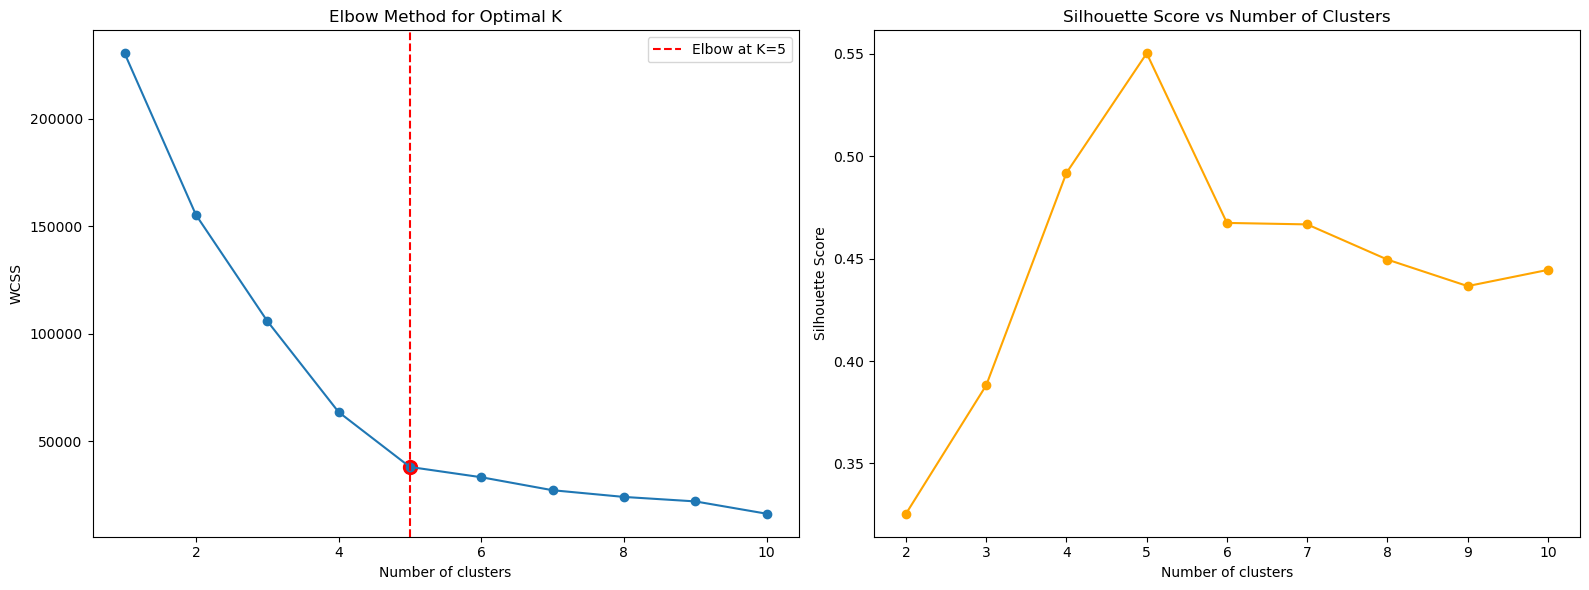

The elbow point is detected at K = 5
Silhouette Score for K=2: 0.3254792731122641
Silhouette Score for K=3: 0.38818351906670057
Silhouette Score for K=4: 0.49187604931693557
Silhouette Score for K=5: 0.5502062330283519
Silhouette Score for K=6: 0.4674313228294854
Silhouette Score for K=7: 0.4667089624343692
Silhouette Score for K=8: 0.44952240106344876
Silhouette Score for K=9: 0.43658716207104076
Silhouette Score for K=10: 0.44450058614737664


In [47]:
# Define WCSS and silhouette score lists
wcss, silhouette_scores = [], []
k_range = range(2, 11)

# Calculate WCSS and silhouette score for each k
for i in range(1, 11):
    kmeans_model = KMeans(n_clusters=i, random_state=42).fit(X_train)
    wcss.append(kmeans_model.inertia_)
    if i > 1:
        silhouette_scores.append(silhouette_score(X_train, kmeans_model.labels_))

# Detect elbow point
elbow_point = KneeLocator(range(1, 11), wcss, curve='convex', direction='decreasing').elbow

# Plot WCSS (Elbow Method) and Silhouette Score
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.plot(range(1, 11), wcss, 'o-')
ax1.axvline(elbow_point, color='red', linestyle='--', label=f'Elbow at K={elbow_point}')
ax1.scatter(elbow_point, wcss[elbow_point-1], color='red', s=100)
ax1.set(title='Elbow Method for Optimal K', xlabel='Number of clusters', ylabel='WCSS')
ax1.legend()

ax2.plot(k_range, silhouette_scores, 'o-', color='orange')
ax2.set(title='Silhouette Score vs Number of Clusters', xlabel='Number of clusters', ylabel='Silhouette Score')

plt.tight_layout()
plt.show()

print(f"The elbow point is detected at K = {elbow_point}")
for k, score in zip(k_range, silhouette_scores):
    print(f"Silhouette Score for K={k}: {score}")


In [49]:
# Based on the elbow method, the optimal K is found to be 5
optimal_k = 5 # Based on the Elbow graph

# K-Means Clustering with optimal K
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_train)

C:\Users\isubh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

In [51]:
# Add cluster labels to the DataFrame
df['KMeans_Cluster'] = kmeans.predict(X)

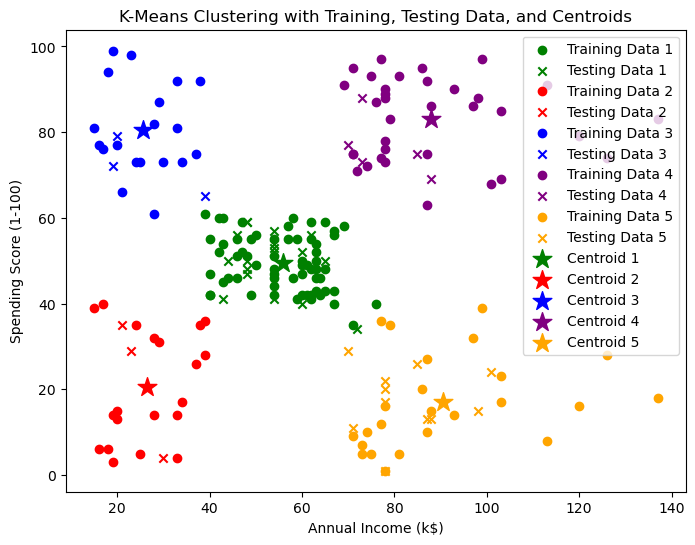

In [53]:
unique_clusters = np.unique(df['KMeans_Cluster'])
colors = ['green', 'red', 'blue', 'purple', 'orange']  # Add more colors if needed

plt.figure(figsize=(8, 6))

# Plot training and testing data for each cluster with distinct markers
for i, cluster in enumerate(unique_clusters):
    plt.scatter(X_train[df.loc[X_train.index, 'KMeans_Cluster'] == cluster]['Annual Income (k$)'], 
                X_train[df.loc[X_train.index, 'KMeans_Cluster'] == cluster]['Spending Score (1-100)'],
                color=colors[i], label=f'Training Data {cluster + 1}', marker='o')
    plt.scatter(X_test[df.loc[X_test.index, 'KMeans_Cluster'] == cluster]['Annual Income (k$)'], 
                X_test[df.loc[X_test.index, 'KMeans_Cluster'] == cluster]['Spending Score (1-100)'],
                color=colors[i], label=f'Testing Data {cluster + 1}', marker='x')

# Plot centroids
for i, color in enumerate(colors[:len(kmeans.cluster_centers_)]):
    plt.scatter(*kmeans.cluster_centers_[i], s=200, color=color, marker='*', label=f'Centroid {i + 1}') 

plt.title('K-Means Clustering with Training, Testing Data, and Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


C:\Users\isubh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\isubh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Fold 1: Silhouette Score = 0.550206233028352
Fold 2: Silhouette Score = 0.45562349210128145


C:\Users\isubh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\isubh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Fold 3: Silhouette Score = 0.5580758532705942
Fold 4: Silhouette Score = 0.5474045187206794


C:\Users\isubh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Fold 5: Silhouette Score = 0.5499260016619452

Average Silhouette Score across all folds: 0.5322472197565705


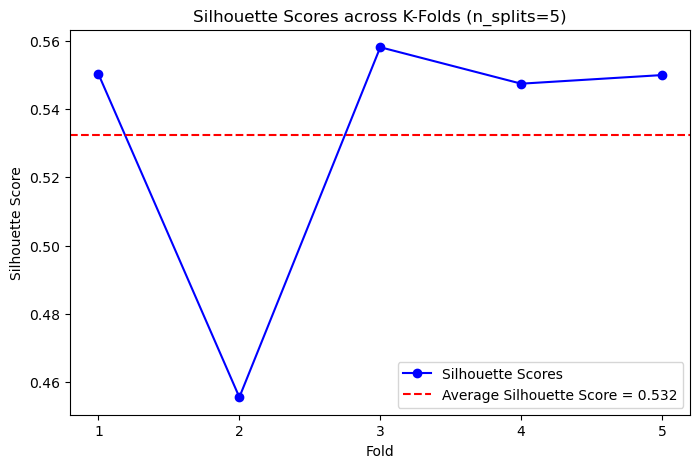

In [121]:
# Define K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Number of clusters
optimal_k = 5

silhouette_scores = []

# Perform cross-validation
for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
    # Split the data into training and testing for each fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    
    # Train KMeans on the training fold
    kmeans_cv = KMeans(n_clusters=optimal_k, random_state=42)
    labels_train = kmeans_cv.fit_predict(X_train)
    
    # Calculate silhouette score for the test data
    silhouette_cv_score = silhouette_score(X_train, labels_train)
    silhouette_scores.append(silhouette_cv_score)
    
    print(f"Fold {fold}: Silhouette Score = {silhouette_cv_score}")

# Average silhouette score across all folds
avg_silhouette_score = np.mean(silhouette_scores)
print(f"\nAverage Silhouette Score across all folds: {avg_silhouette_score}")

# Plotting the silhouette scores across folds
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(silhouette_scores) + 1), silhouette_scores, marker='o', color='blue', linestyle='-', label='Silhouette Scores')
plt.axhline(y=avg_silhouette_score, color='red', linestyle='--', label=f'Average Silhouette Score = {avg_silhouette_score:.3f}')

# Add titles and labels
plt.title(f'Silhouette Scores across K-Folds (n_splits={kf.n_splits})')
plt.xlabel('Fold')
plt.ylabel('Silhouette Score')
plt.xticks(range(1, len(silhouette_scores) + 1))  # Set x-ticks to fold numbers
plt.legend()

# Show the plot
plt.show()

In [123]:
# Hierarchical Clustering using Euclidean distance
hierarchical = AgglomerativeClustering(n_clusters=5, linkage='ward', metric='euclidean')
hierarchical.fit(X_train)

AgglomerativeClustering(n_clusters=5)

In [135]:
# Add cluster labels to the DataFrame
df['Hierarchical_Cluster'] = hierarchical.fit_predict(X)

In [137]:
# Evaluating Hierarchical Clustering using Silhouette Score
hierarchical_sil_score = silhouette_score(X, hierarchical.labels_)
print("Hierarchical Clustering Silhouette Score: ", hierarchical_sil_score)

Hierarchical Clustering Silhouette Score:  0.5529945955148897


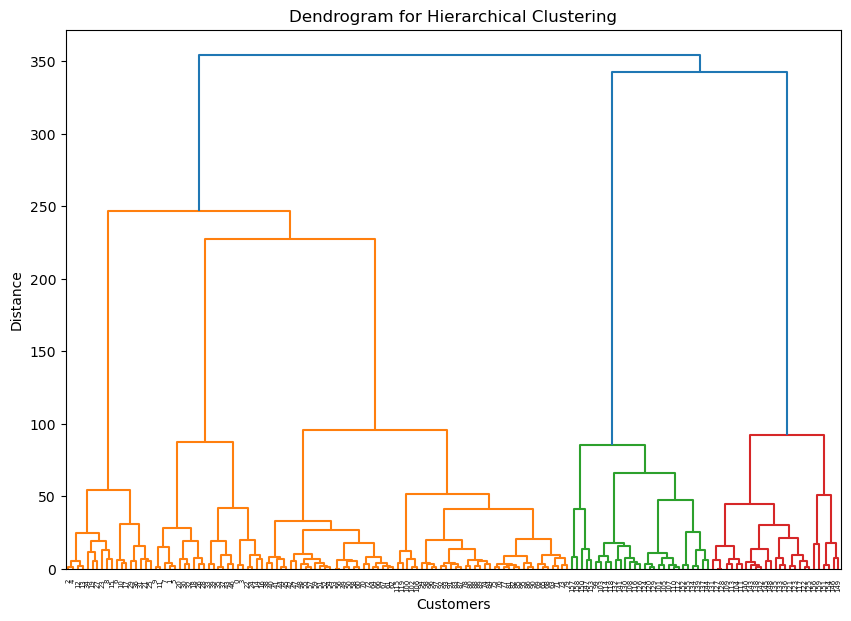

In [139]:
# Dendrogram for Hierarchical Clustering
Z = linkage(X_train, method='ward', metric='euclidean')
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Customers')
plt.ylabel('Distance')
plt.show()

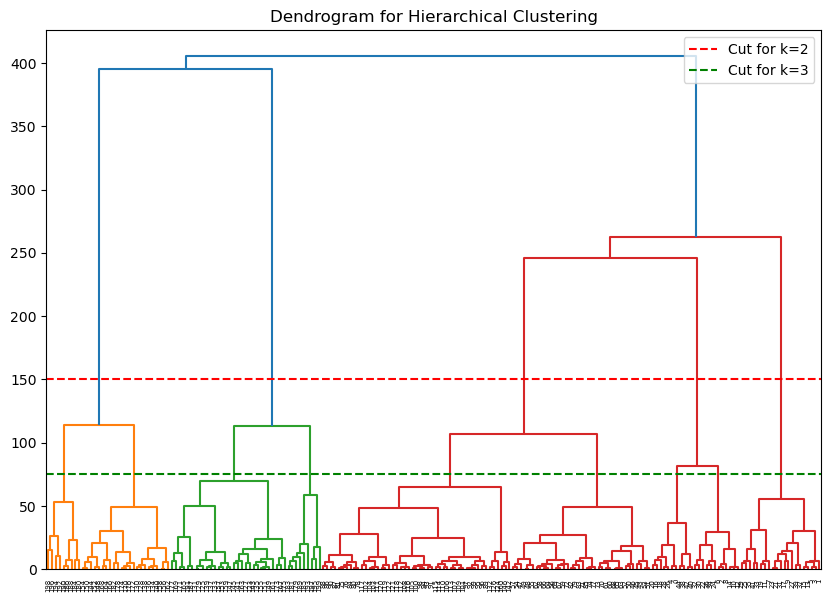

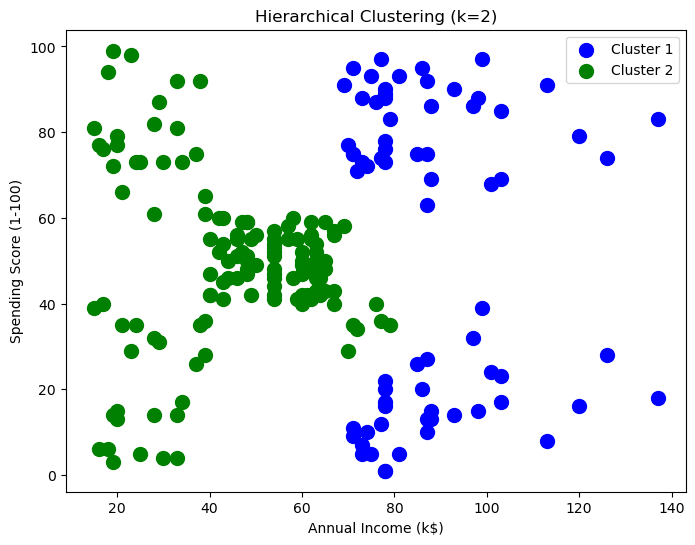

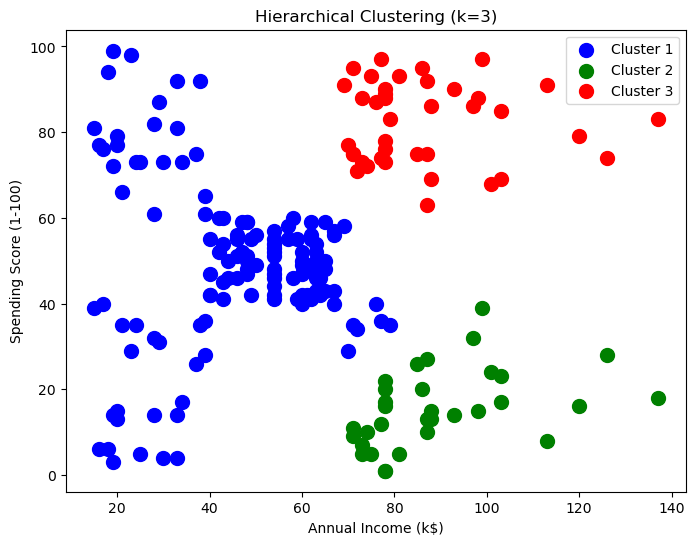

In [141]:
# Perform hierarchical/agglomerative clustering
linked = linkage(X, method='ward')

# Plotting the Dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)

plt.title("Dendrogram for Hierarchical Clustering")
plt.axhline(y=150, color='r', linestyle='--', label='Cut for k=2')  # Horizontal line for k=2
plt.axhline(y=75, color='g', linestyle='--', label='Cut for k=3')   # Horizontal line for k=3
plt.legend()
plt.show()

# Agglomerative clustering for k=2
hc_k2 = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
y_hc_k2 = hc_k2.fit_predict(X)

# Agglomerative clustering for k=3
hc_k3 = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
y_hc_k3 = hc_k3.fit_predict(X)

# Plotting the clusters for k=2
plt.figure(figsize=(8, 6))
plt.scatter(X['Annual Income (k$)'][y_hc_k2 == 0], X['Spending Score (1-100)'][y_hc_k2 == 0], s=100, c='blue', label='Cluster 1')
plt.scatter(X['Annual Income (k$)'][y_hc_k2 == 1], X['Spending Score (1-100)'][y_hc_k2 == 1], s=100, c='green', label='Cluster 2')

plt.title('Hierarchical Clustering (k=2)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# Plotting the clusters for k=3
plt.figure(figsize=(8, 6))
plt.scatter(X['Annual Income (k$)'][y_hc_k3 == 0], X['Spending Score (1-100)'][y_hc_k3 == 0], s=100, c='blue', label='Cluster 1')
plt.scatter(X['Annual Income (k$)'][y_hc_k3 == 1], X['Spending Score (1-100)'][y_hc_k3 == 1], s=100, c='green', label='Cluster 2')
plt.scatter(X['Annual Income (k$)'][y_hc_k3 == 2], X['Spending Score (1-100)'][y_hc_k3 == 2], s=100, c='red', label='Cluster 3')

plt.title('Hierarchical Clustering (k=3)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()